In [59]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from time import time
from matplotlib import pyplot as plt

import LimitedCommitmentModel as lcm
from figure_manager import FigureManager

path = 'output/'

# c++ settings
do_compile = True
threads = 20

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Solve and simulate model

Benchmark model settings

In [60]:
settings = { 
       'T':20,
       'p_meet': 0.1, 
       'div_A_share': 0.5, 
       'sigma_love':0.1, 
       
       'inc_w' : 1.0,
       'inc_m' : 1.5,

       'num_love': 31, 
       'num_A': 50, 
       'num_A_pd':50,

       'simT':20,
       'simN': 10000,

       'do_egm': True,
       'interp_method' : "linear",
       'precompute_intratemporal' : True,
       'interp_inverse': True,
       'num_marg_u': 100,
       'threads':threads,
       }


## Sanity checks

In [61]:
# setup model
model = lcm.HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=False)

# solve and simulate
model.solve()
model.simulate()

In [62]:
# set index
t = 5
iL = 16
iP = 8
iA = 30

index_slice = (t,iL,iP,iA)

Saved full figure to output\single_to_single.pdf
Saved subplot to output\single_to_single_subplot_1.pdf
Saved subplot to output\single_to_single_subplot_2.pdf
Saved subplot to output\single_to_single_subplot_3.pdf
Saved subplot to output\single_to_single_subplot_4.pdf


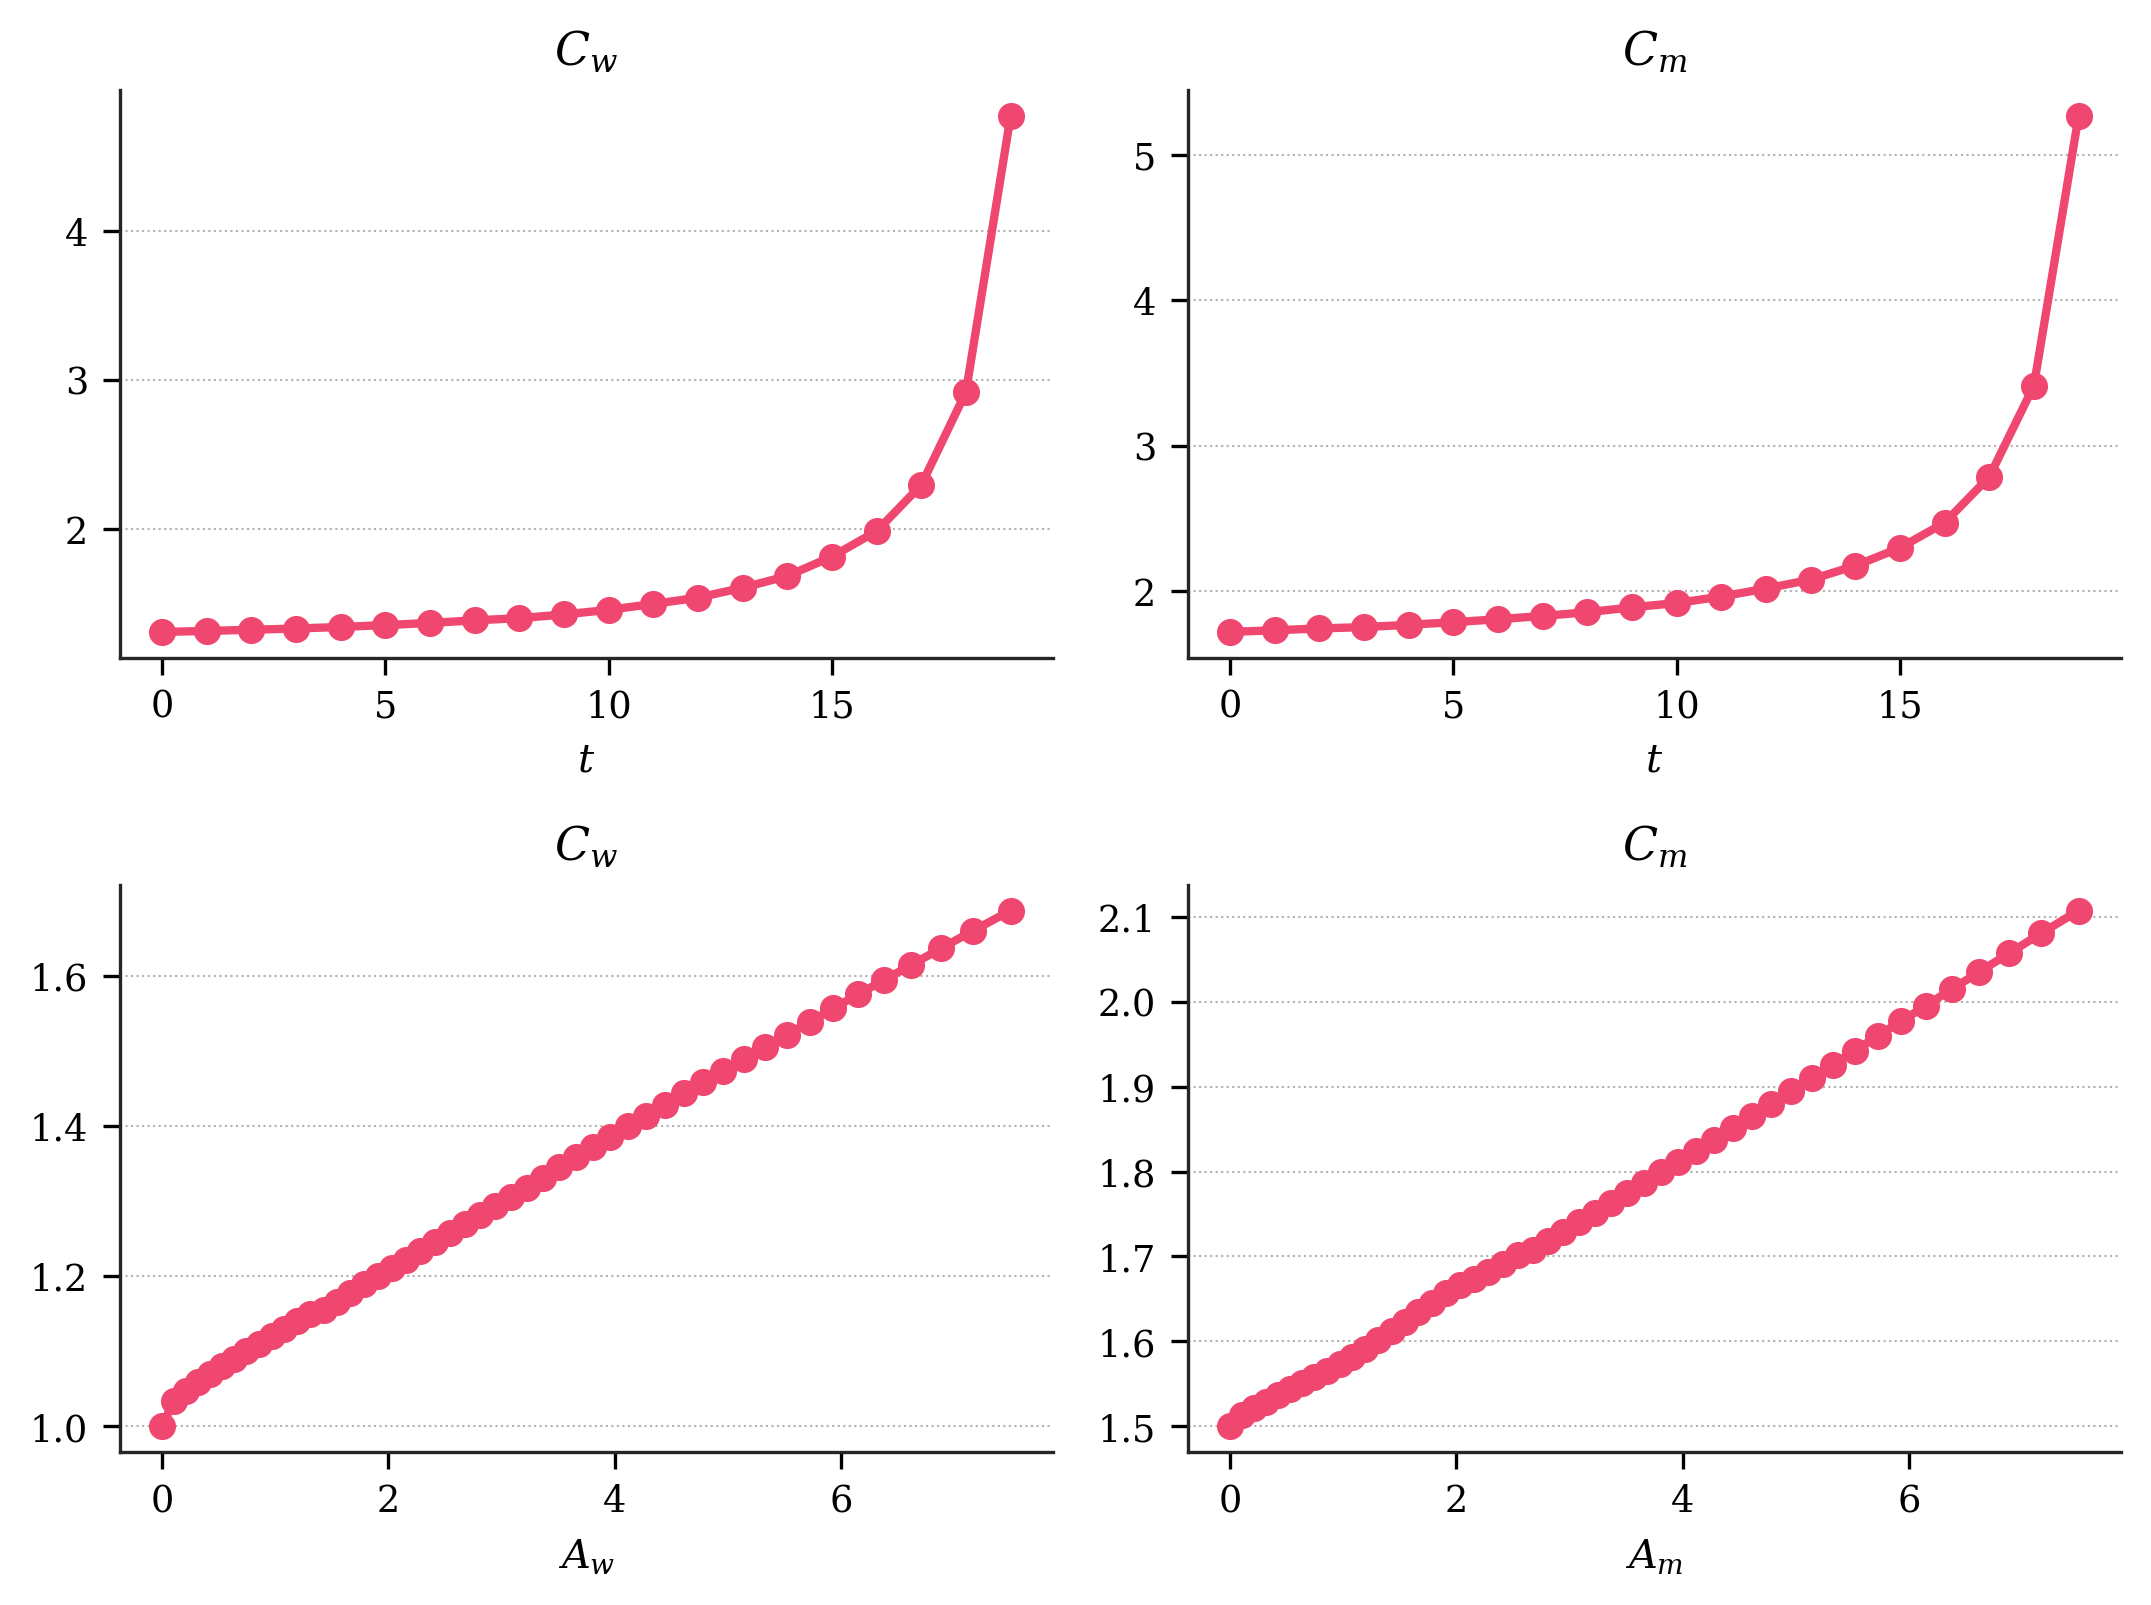

In [63]:
fm = FigureManager(output_dir="output", use_latex=False)
fig, ax = fm.create_figure(2,2,4)

# plot_var_over_grid(ax[0], model, 'Cw_tot_single_to_single', index_slice, grid='time')
ax[0].plot(np.arange(0,model.par.T), model.sol.Cw_tot_single_to_single[:,iA])
ax[0].set_title(r'$C_w$')
ax[0].set_xlabel(r'$t$')

ax[1].plot(np.arange(0,model.par.T), model.sol.Cm_tot_single_to_single[:,iA])
ax[1].set_title(r'$C_m$')
ax[1].set_xlabel(r'$t$')

ax[2].plot(model.par.grid_Aw, model.sol.Cw_tot_single_to_single[t,:])
ax[2].set_title(r'$C_w$')
ax[2].set_xlabel(r'$A_w$')

ax[3].plot(model.par.grid_Am, model.sol.Cm_tot_single_to_single[t,:])
ax[3].set_title(r'$C_m$')
ax[3].set_xlabel(r'$A_m$')

fm.save_figure(filename="single_to_single")

## Other stuff

Setup model

In [64]:
# setup alternative model solution
model = lcm.HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=False)

In [65]:
def plot_power(par_names,par_values,model):

    # update parameters
    for n,name in enumerate(par_names):
        setattr(model.par,name,par_values[n])
    
    # solve and simulate
    model.solve()
    model.simulate()
    
    # plot
    sim = model.sim
    
    I = sim.power>0
    cons_share  = (sim.Cw_priv/sim.Cm_priv)[I]
    cons_share  = (sim.Cw_priv/sim.C_tot)[I]
    power = sim.power[I]

    fig, ax = plt.subplots()
    ax.scatter(cons_share,power,label=par_values[0],alpha=0.2);
    ax.set(ylim=[0.0,1.0])
    ax.legend();
    

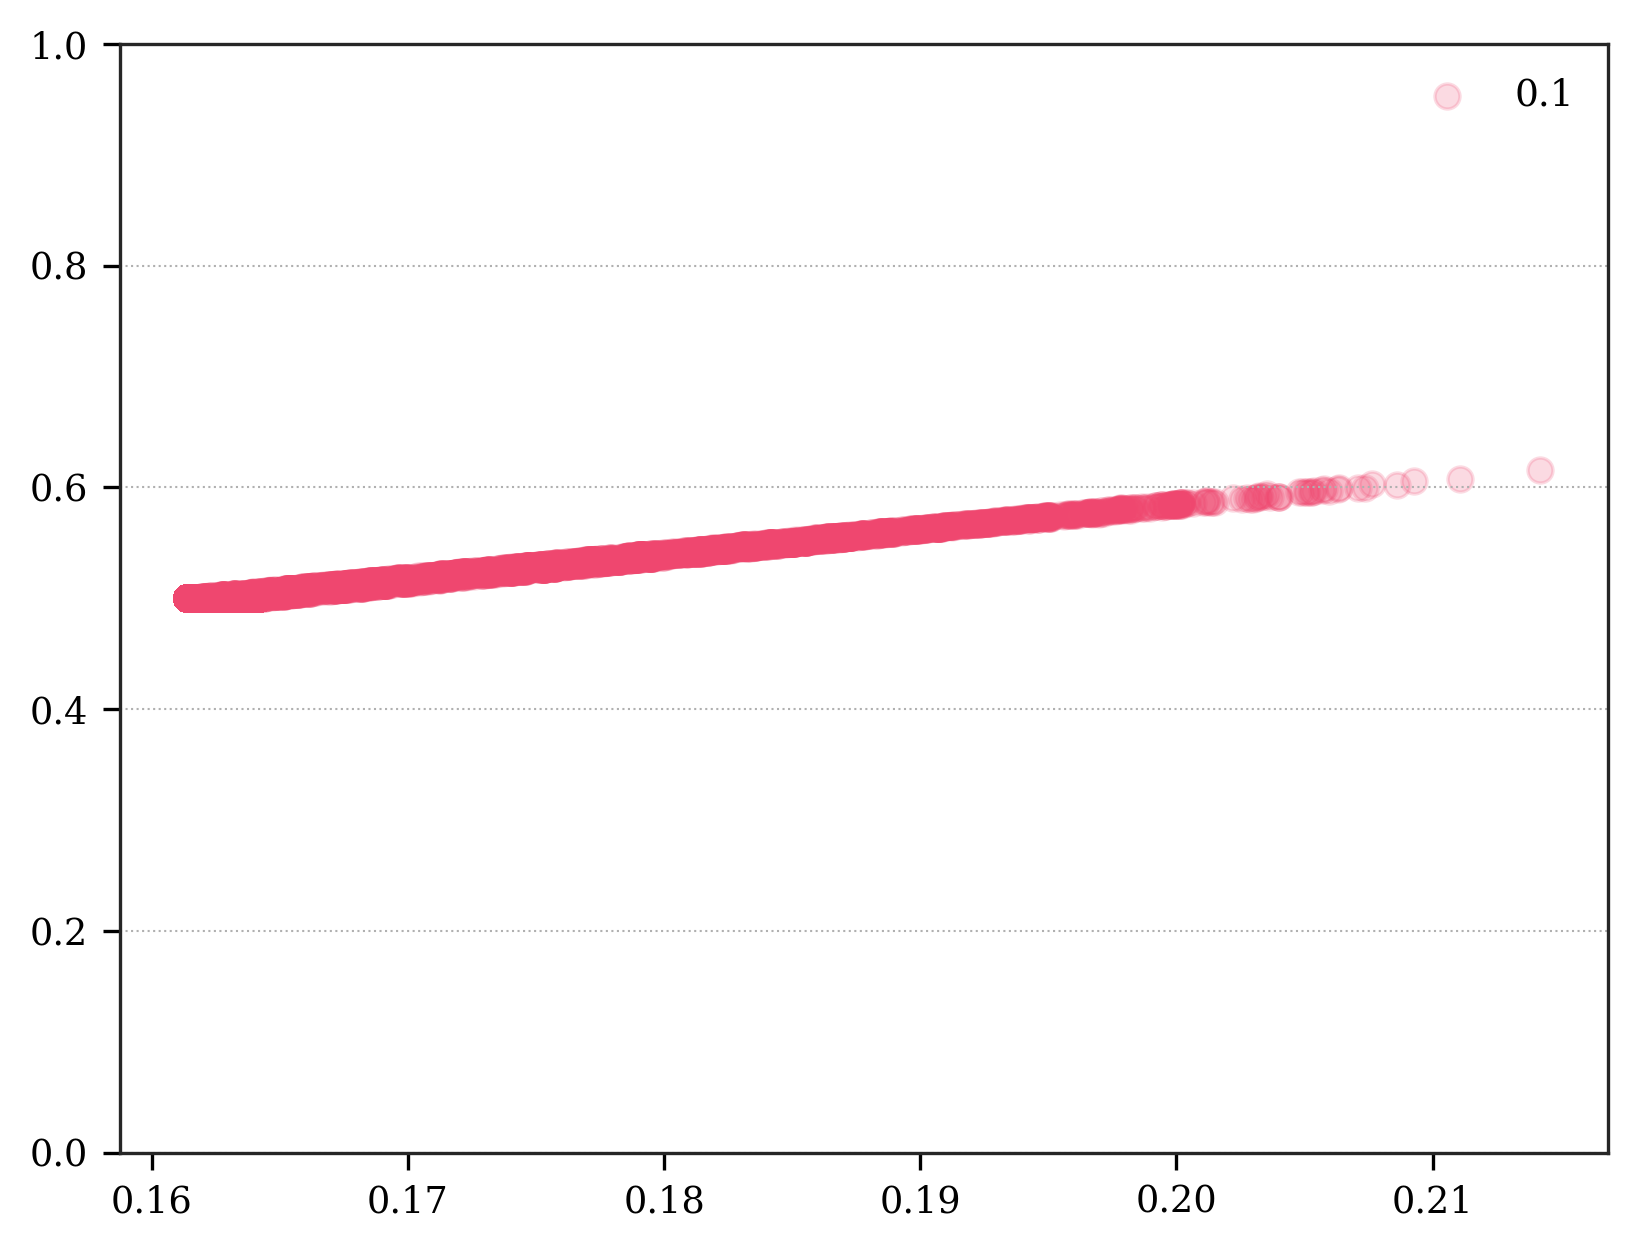

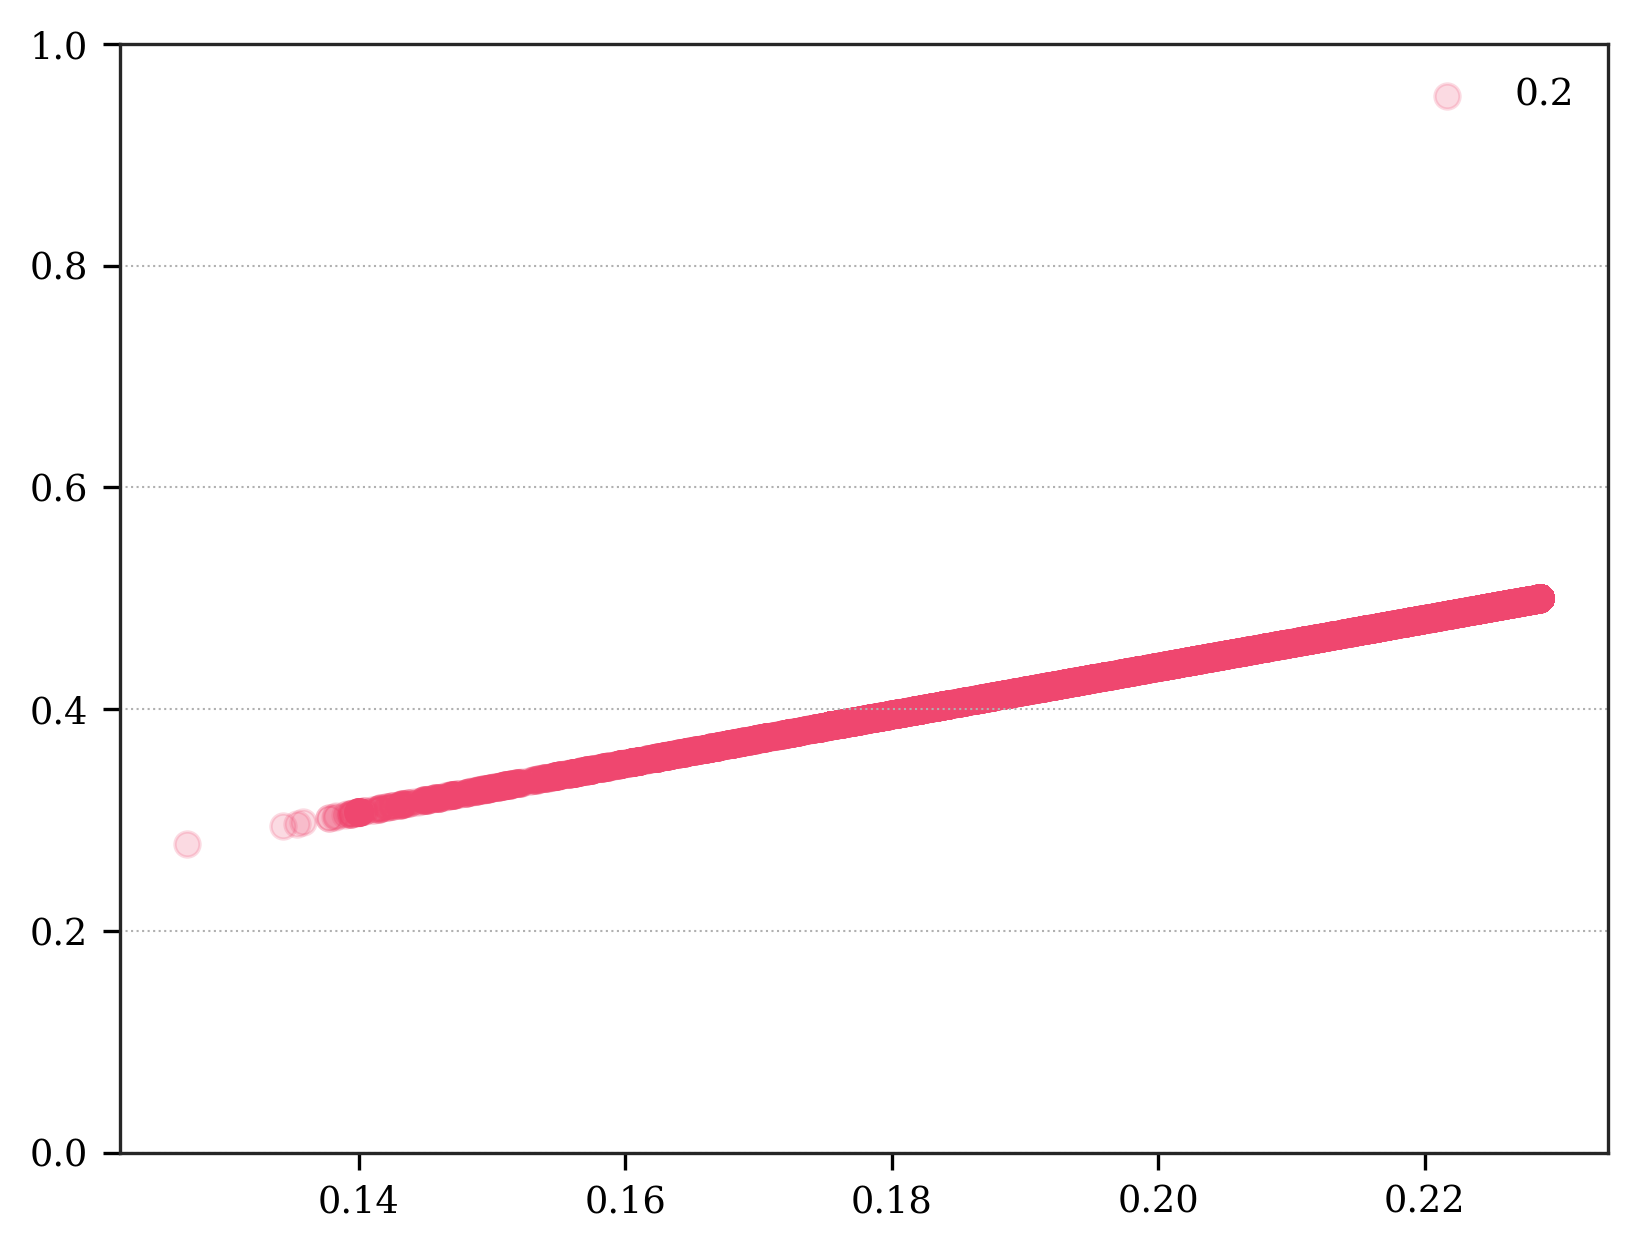

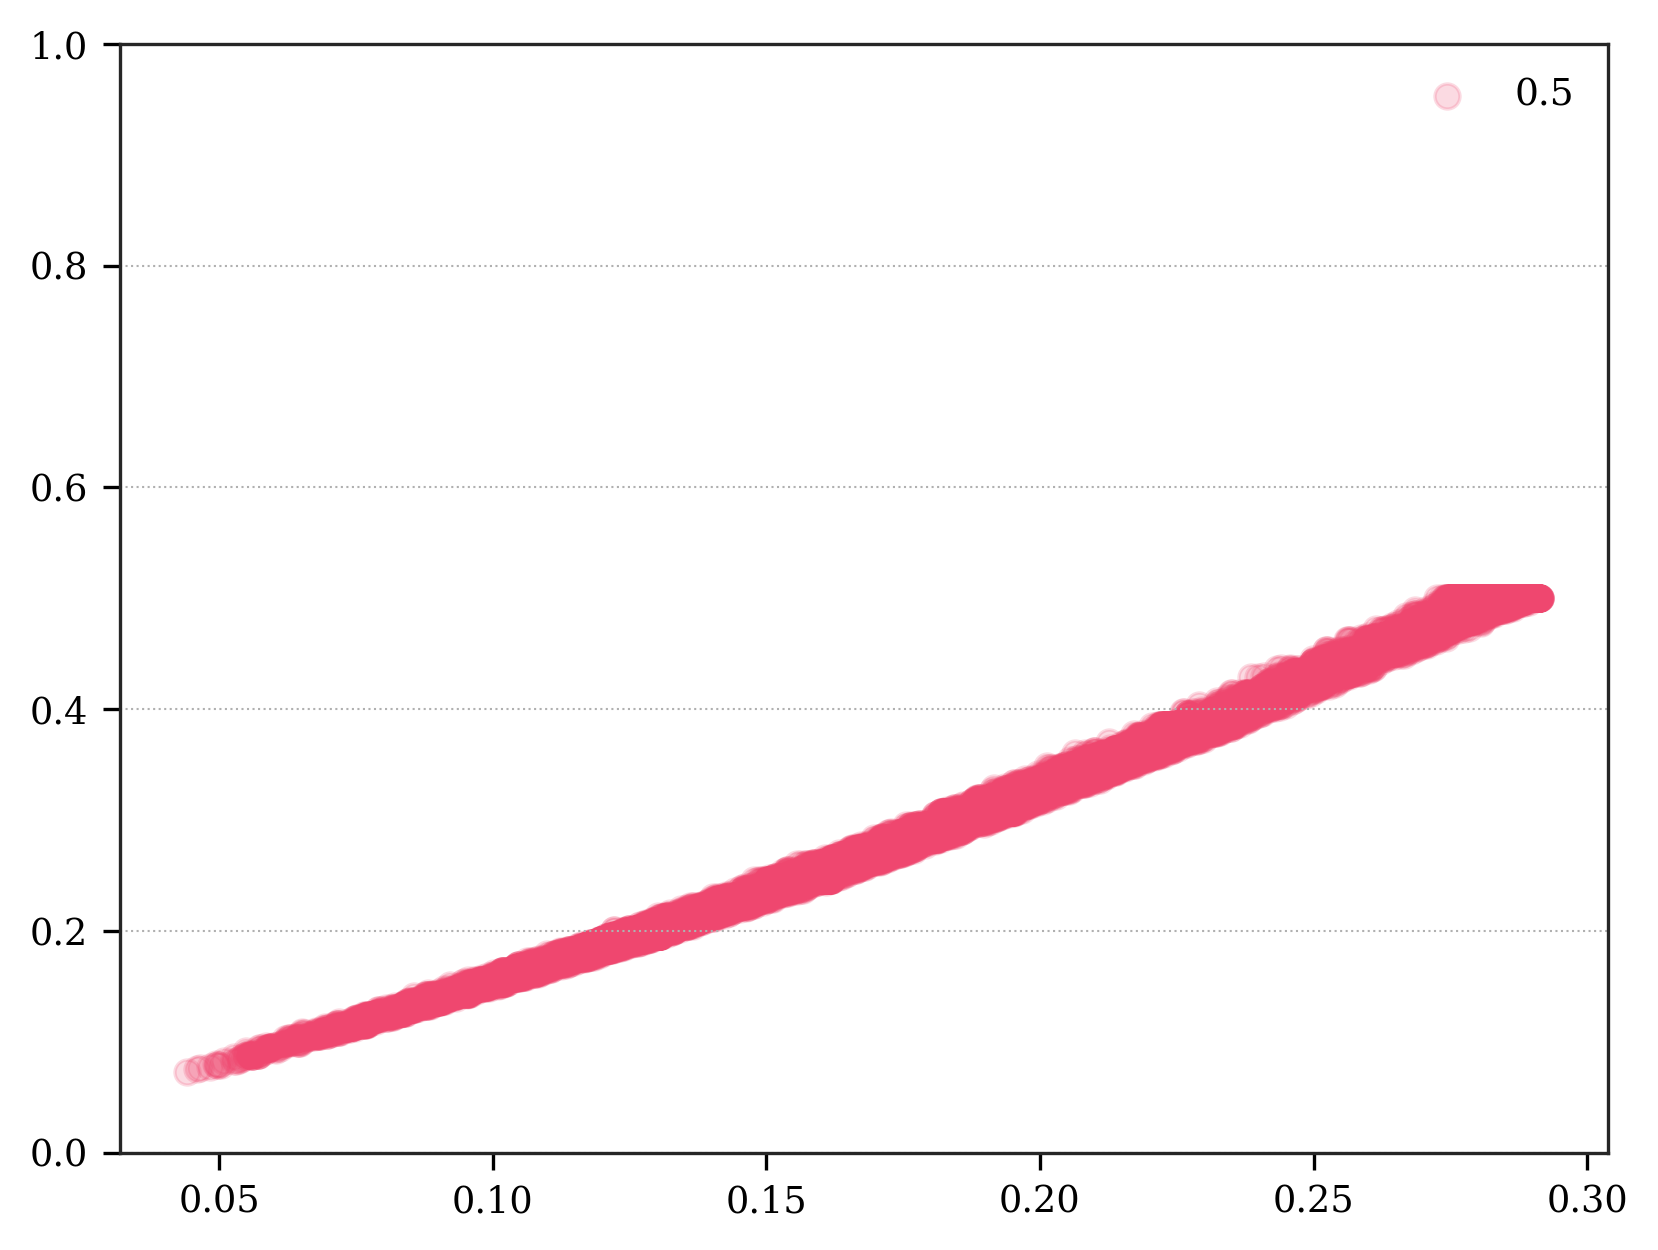

In [66]:
for phi_w in (0.1,0.2,0.5):
    plot_power(('phi_w',),(phi_w,),model)